In [28]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Model_0


10% of training data and transfer learning models

In [29]:
#Importing the helper function
! wget "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py"

--2021-05-19 14:29:03--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-05-19 14:29:03 (88.3 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [30]:
from helper_functions import unzip_data,walk_through_dir, create_tensorboard_callback


In [31]:
!wget "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip"

--2021-05-19 14:29:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.31.128, 172.217.164.144, 142.250.73.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   244MB/s    in 0.7s    

2021-05-19 14:29:04 (244 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [32]:
unzip_data("/content/10_food_classes_10_percent.zip")

In [33]:
walk_through_dir("/content/10_food_classes_10_percent")

There are 2 directories and 0 images in '/content/10_food_classes_10_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '/content/10_food_classes_10

In [34]:
#Prepare data
import tensorflow as tf

IMAGE_SHAPE= (224,224)
BATCH_SIZE = 32

train_dir = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"


traindata = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                image_size=IMAGE_SHAPE,
                                                label_mode = 'categorical',
                                                batch_size = BATCH_SIZE)

testdata = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                image_size=IMAGE_SHAPE,
                                                label_mode = 'categorical',
                                                batch_size = BATCH_SIZE)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [35]:
#Create models with Functional API
import tensorflow as tf

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3),name='input_layer')
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_avg_pooling')(x)
outputs = tf.keras.layers.Dense(10,activation="softmax")(x)

model_0 = tf.keras.Model(inputs,outputs)


In [36]:
model_0.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics = ['accuracy'])

In [37]:
model_0.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_avg_pooling (GlobalAv (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [38]:
history_0  = model_0.fit(traindata,epochs=5,
                         steps_per_epoch = len(traindata),
                         validation_data = testdata,
                         validation_steps = len(testdata),
                         callbacks=[create_tensorboard_callback('transfer_learning','model_0')])

Saving TensorBoard log files to: transfer_learning/model_0/20210519-142908
Epoch 1/5
24/24 [==============================] - 19s 622ms/step - loss: 2.1777 - accuracy: 0.2275 - val_loss: 1.3825 - val_accuracy: 0.6836
Epoch 2/5
24/24 [==============================] - 13s 527ms/step - loss: 1.2918 - accuracy: 0.6935 - val_loss: 0.9412 - val_accuracy: 0.7932
Epoch 3/5
24/24 [==============================] - 13s 527ms/step - loss: 0.8868 - accuracy: 0.7884 - val_loss: 0.7609 - val_accuracy: 0.8288
Epoch 4/5
24/24 [==============================] - 13s 529ms/step - loss: 0.7223 - accuracy: 0.8285 - val_loss: 0.6673 - val_accuracy: 0.8384
Epoch 5/5
24/24 [==============================] - 13s 525ms/step - loss: 0.6110 - accuracy: 0.8645 - val_loss: 0.6114 - val_accuracy: 0.8452


In [39]:
model_0.evaluate(testdata)

79/79 [==============================] - 10s 120ms/step - loss: 0.6114 - accuracy: 0.8452


[0.6113557815551758, 0.8452000021934509]

In [40]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling_3 (Rescaling)         (None, None, None, 3 0           input_4[0][0]                    
__________________________________________________________________________________________________
normalization_3 (Normalization) (None, None, None, 3 7           rescaling_3[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization_3[0][0]            
_____________________________________________________________________________________

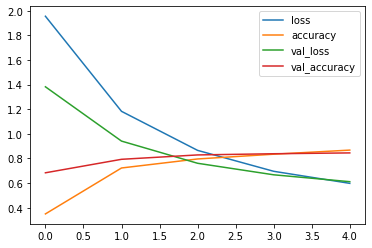

In [41]:

pd.DataFrame(history_0.history).plot()

# Model_1

Experiment with 1% of training data with the same model with data augmentation

In [42]:
!wget "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip"

--2021-05-19 14:30:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.128, 172.217.2.112, 172.253.63.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.1’

10_food_classes_1_p 100%[===================>] 127.42M   287MB/s    in 0.4s    

2021-05-19 14:30:30 (287 MB/s) - ‘10_food_classes_1_percent.zip.1’ saved [133612354/133612354]



In [43]:
unzip_data("10_food_classes_1_percent.zip")

In [44]:
walk_through_dir("/content/10_food_classes_1_percent")

There are 2 directories and 0 images in '/content/10_food_classes_1_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/te

In [45]:
#Prepare data

IMAGE_SHAPE= (224,224)
BATCH_SIZE = 32

train_dir_1 = "/content/10_food_classes_1_percent/train"
test_dir_1 = "/content/10_food_classes_1_percent/test"


traindata_1 = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_1,
                                                image_size=IMAGE_SHAPE,
                                                label_mode = 'categorical',
                                                batch_size = BATCH_SIZE)

testdata_1 = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir_1,
                                                image_size=IMAGE_SHAPE,
                                                label_mode = 'categorical',
                                                batch_size = BATCH_SIZE)


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [46]:
#Create models with Functional API
from tensorflow.keras.layers.experimental import preprocessing

base_model_1 = tf.keras.applications.EfficientNetB0(include_top=False)
base_model_1.trainable = False

data_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2)                                   
],name = "data_augmentation")

inputs_1 = tf.keras.layers.Input(shape=(224,224,3),name='input_layer')
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)
x = data_augmentation(inputs_1)
x = base_model_1(x)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_avg_pooling')(x)
outputs_1 = tf.keras.layers.Dense(10,activation="softmax")(x)

model_1 = tf.keras.Model(inputs_1,outputs_1)

In [47]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics = ['accuracy'])

In [48]:
history_1  = model_1.fit(traindata_1,epochs=5,
                         steps_per_epoch = len(traindata_1),
                         validation_data = testdata_1,
                         validation_steps = len(testdata_1),
                         callbacks=[create_tensorboard_callback('transfer_learning','model_1')])

Saving TensorBoard log files to: transfer_learning/model_1/20210519-143034
Epoch 1/5
3/3 [==============================] - 17s 6s/step - loss: 2.3554 - accuracy: 0.1346 - val_loss: 2.2445 - val_accuracy: 0.1608
Epoch 2/5
3/3 [==============================] - 10s 5s/step - loss: 2.1497 - accuracy: 0.2379 - val_loss: 2.1204 - val_accuracy: 0.2460
Epoch 3/5
3/3 [==============================] - 10s 5s/step - loss: 2.0270 - accuracy: 0.3459 - val_loss: 2.0179 - val_accuracy: 0.3092
Epoch 4/5
3/3 [==============================] - 10s 5s/step - loss: 1.8394 - accuracy: 0.4344 - val_loss: 1.9244 - val_accuracy: 0.3676
Epoch 5/5
3/3 [==============================] - 10s 5s/step - loss: 1.6895 - accuracy: 0.6300 - val_loss: 1.8402 - val_accuracy: 0.4276


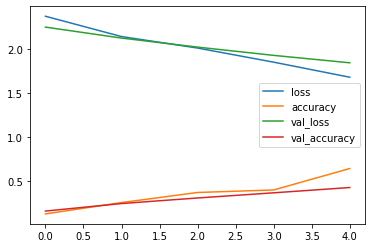

In [49]:
pd.DataFrame(history_1.history).plot()

# Model_2

10% of Data with Data Augmentation

In [50]:
train_dir = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"


traindata = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                image_size=IMAGE_SHAPE,
                                                label_mode = 'categorical',
                                                batch_size = BATCH_SIZE)

testdata = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                image_size=IMAGE_SHAPE,
                                                label_mode = 'categorical',
                                                batch_size = BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [51]:

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

data_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2)                                   
],name = "data_augmentation")

inputs = tf.keras.layers.Input(shape=(224,224,3),name='input_layer')
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)
x = data_augmentation(inputs)
x = base_model(x)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_avg_pooling')(x)
outputs = tf.keras.layers.Dense(10,activation="softmax")(x)

model_2 = tf.keras.Model(inputs,outputs)

In [52]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics = ['accuracy'])

In [53]:
history_2  = model_2.fit(traindata,epochs=10,
                         steps_per_epoch = len(traindata),
                         validation_data = testdata,
                         validation_steps = len(testdata),
                         callbacks=[create_tensorboard_callback('transfer_learning','model_2')])

Saving TensorBoard log files to: transfer_learning/model_2/20210519-143136
Epoch 1/10
24/24 [==============================] - 21s 631ms/step - loss: 2.2234 - accuracy: 0.2181 - val_loss: 1.5311 - val_accuracy: 0.5940
Epoch 2/10
24/24 [==============================] - 13s 530ms/step - loss: 1.5104 - accuracy: 0.5730 - val_loss: 1.0782 - val_accuracy: 0.7348
Epoch 3/10
24/24 [==============================] - 13s 530ms/step - loss: 1.1556 - accuracy: 0.7139 - val_loss: 0.8812 - val_accuracy: 0.7728
Epoch 4/10
24/24 [==============================] - 13s 528ms/step - loss: 0.9855 - accuracy: 0.7494 - val_loss: 0.7808 - val_accuracy: 0.7852
Epoch 5/10
24/24 [==============================] - 13s 530ms/step - loss: 0.8891 - accuracy: 0.7659 - val_loss: 0.6985 - val_accuracy: 0.8064
Epoch 6/10
24/24 [==============================] - 13s 525ms/step - loss: 0.7870 - accuracy: 0.7978 - val_loss: 0.6579 - val_accuracy: 0.8176
Epoch 7/10
24/24 [==============================] - 13s 528ms/step 

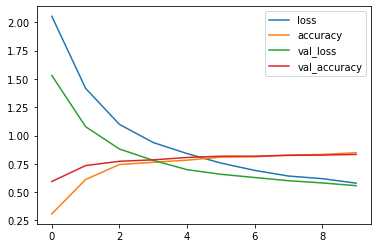

In [54]:
pd.DataFrame(history_2.history).plot()

# Model 3

10% of data with augmentation and fine tuning top 10 layers

In [55]:
#Data Preprocessing

train_dir = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"


traindata = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                image_size=IMAGE_SHAPE,
                                                label_mode = 'categorical',
                                                batch_size = BATCH_SIZE)

testdata = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                image_size=IMAGE_SHAPE,
                                                label_mode = 'categorical',
                                                batch_size = BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [56]:

base_model_03 = tf.keras.applications.EfficientNetB0(include_top=False)
base_model_03.trainable = True

for layer in base_model_03.layers[:-10]:
  layer.trainable = False


data_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2)                                   
],name = "data_augmentation")

inputs = tf.keras.layers.Input(shape=(224,224,3),name='input_layer')
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)
x = data_augmentation(inputs)
x = base_model_03(x)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_avg_pooling')(x)
outputs = tf.keras.layers.Dense(10,activation="softmax")(x)

model_3 = tf.keras.Model(inputs,outputs)

In [57]:
model_3.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                loss='categorical_crossentropy',
                metrics = ['accuracy'])

In [58]:
history_3  = model_3.fit(traindata,epochs=10,
                         steps_per_epoch = len(traindata),
                         validation_data = testdata,
                         validation_steps = len(testdata),
                         callbacks=[create_tensorboard_callback('transfer_learning','model_3')])

Saving TensorBoard log files to: transfer_learning/model_3/20210519-150128
Epoch 1/10
24/24 [==============================] - 21s 653ms/step - loss: 2.2982 - accuracy: 0.1733 - val_loss: 1.8672 - val_accuracy: 0.4468
Epoch 2/10
24/24 [==============================] - 13s 526ms/step - loss: 1.8574 - accuracy: 0.4516 - val_loss: 1.4623 - val_accuracy: 0.6516
Epoch 3/10
24/24 [==============================] - 13s 531ms/step - loss: 1.5530 - accuracy: 0.6107 - val_loss: 1.1511 - val_accuracy: 0.7396
Epoch 4/10
24/24 [==============================] - 13s 534ms/step - loss: 1.2667 - accuracy: 0.6886 - val_loss: 0.9400 - val_accuracy: 0.7792
Epoch 5/10
24/24 [==============================] - 13s 531ms/step - loss: 1.0935 - accuracy: 0.7255 - val_loss: 0.8071 - val_accuracy: 0.7968
Epoch 6/10
24/24 [==============================] - 13s 535ms/step - loss: 0.9868 - accuracy: 0.7332 - val_loss: 0.7232 - val_accuracy: 0.8108
Epoch 7/10
24/24 [==============================] - 13s 530ms/step 

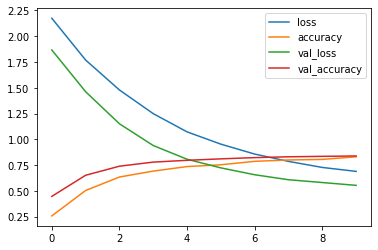

In [59]:
pd.DataFrame(history_3.history).plot()

In [61]:
model_3.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, 224, 3)      0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_avg_pooling (GlobalAv (None, 1280)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                12810     
Total params: 4,062,381
Trainable params: 906,042
Non-trainable params: 3,156,339
_________________________________________________________________


# Model 4

with 100% data and with image augmentation and fine tuning last 10 layers

In [62]:
!wget "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip"

--2021-05-19 15:14:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.144, 142.250.73.208, 142.250.73.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   206MB/s    in 2.4s    

2021-05-19 15:14:22 (206 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [63]:
unzip_data("/content/10_food_classes_all_data.zip")

In [64]:
walk_through_dir("/content/10_food_classes_all_data")

There are 2 directories and 0 images in '/content/10_food_classes_all_data'.
There are 10 directories and 0 images in '/content/10_food_classes_all_data/test'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/sushi'.


In [65]:
#Data Preprocessing

train_dir_04 = "/content/10_food_classes_all_data/train"
test_dir_04 = "/content/10_food_classes_all_data/test"


traindata = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_04,
                                                image_size=IMAGE_SHAPE,
                                                label_mode = 'categorical',
                                                batch_size = BATCH_SIZE)

testdata = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir_04,
                                                image_size=IMAGE_SHAPE,
                                                label_mode = 'categorical',
                                                batch_size = BATCH_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [66]:

base_model_04 = tf.keras.applications.EfficientNetB0(include_top=False)
base_model_04.trainable = True

for layer in base_model_04.layers[:-10]:
  layer.trainable = False


data_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2)                                   
],name = "data_augmentation")

inputs = tf.keras.layers.Input(shape=(224,224,3),name='input_layer')
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)
x = data_augmentation(inputs)
x = base_model_04(x)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_avg_pooling')(x)
outputs = tf.keras.layers.Dense(10,activation="softmax")(x)

model_4 = tf.keras.Model(inputs,outputs)

In [67]:
model_4.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                loss='categorical_crossentropy',
                metrics = ['accuracy'])

In [68]:
history_4  = model_4.fit(traindata,epochs=10,
                         steps_per_epoch = len(traindata),
                         validation_data = testdata,
                         validation_steps = len(testdata),
                         callbacks=[create_tensorboard_callback('transfer_learning','model_4')])

Saving TensorBoard log files to: transfer_learning/model_4/20210519-151912
Epoch 1/10
235/235 [==============================] - 49s 185ms/step - loss: 1.7074 - accuracy: 0.4671 - val_loss: 0.5369 - val_accuracy: 0.8384
Epoch 2/10
235/235 [==============================] - 41s 174ms/step - loss: 0.7973 - accuracy: 0.7626 - val_loss: 0.4083 - val_accuracy: 0.8672
Epoch 3/10
235/235 [==============================] - 41s 174ms/step - loss: 0.6703 - accuracy: 0.7995 - val_loss: 0.3621 - val_accuracy: 0.8824
Epoch 4/10
235/235 [==============================] - 41s 174ms/step - loss: 0.6060 - accuracy: 0.8116 - val_loss: 0.3379 - val_accuracy: 0.8872
Epoch 5/10
235/235 [==============================] - 41s 174ms/step - loss: 0.5521 - accuracy: 0.8262 - val_loss: 0.3193 - val_accuracy: 0.8920
Epoch 6/10
235/235 [==============================] - 41s 174ms/step - loss: 0.5173 - accuracy: 0.8461 - val_loss: 0.3114 - val_accuracy: 0.8964
Epoch 7/10
235/235 [==============================] - 4

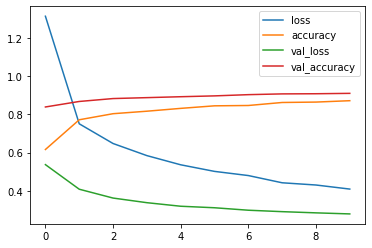

In [69]:
pd.DataFrame(history_4.history).plot()

In [70]:
model_4.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, 224, 3)      0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_avg_pooling (GlobalAv (None, 1280)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                12810     
Total params: 4,062,381
Trainable params: 906,042
Non-trainable params: 3,156,339
_________________________________________________________________
